   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
   age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86
Enter age : 46
Enter sex ("M=1 / F=0") : 1
Enter bmi : 36
The predicted value of ("smoker = 1 / non-smoker = 0") is: 0


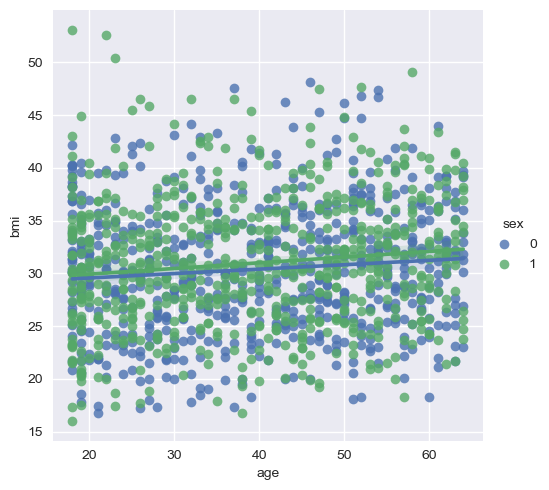

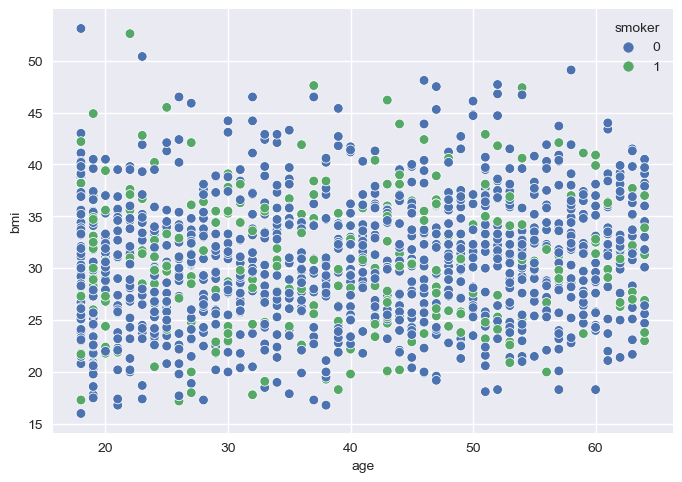

Accuracy: 0.7985074626865671


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/KARTHIK/Downloads/h/insurance.csv')
print(data.head())
data['smoker']=data['smoker'].astype('category')
data['smoker']=data['smoker'].cat.codes
data['region']=data['region'].astype('category')
data['region']=data['region'].cat.codes
data['sex']=data['sex'].astype('category')
data['sex']=data['sex'].cat.codes
print(data.head())

X = data[['age', 'sex', 'bmi']]
y = data['smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k = 27 
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
x1 = float(input('Enter age : '))
x2 = float(input('Enter sex ("M=1 / F=0") : '))
x3 = float(input('Enter bmi : '))

user_input = pd.DataFrame({'age': [x1], 'sex': [x2], 'bmi': [x3]})
prediction = knn.predict(user_input)
print('The predicted value of ("smoker = 1 / non-smoker = 0") is:', prediction[0])

sns.lmplot(x="age",y="bmi",hue='sex',data=data)
plt.show()

sns.scatterplot(x="age",y="bmi",hue='smoker',data=data)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy)